In [4]:
import pandas as pd
import seaborn as sns
import random
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

# Исследование смещённости исправленной и обычной дисперсии

Исследование основано на равномерном распределении на $\xi \sim [0, 1]$.
$D(\xi) = \dfrac{1}{12}$


In [5]:
import random
import numpy as np

#### Самописные функции для вычисление первого, второго момента, а также выборочной и исправленной выборочной дисперсии.
#### А также функция для генерации дисперсии (исправленной и обычной) выборки из равномерного распределения.

In [6]:
def m1(array):
    return sum(array) / len(array)
def m2(array):
    return sum(list(map(lambda x: x ** 2, array))) / len(array)
def D(array):
    return m2(array) - m1(array) ** 2
def D_corr(array):
    return len(array) / (len(array) - 1) * D(array)
def sample(size=10):
    array = np.random.uniform(low=0.0, high=1, size=size)
    return (D_corr(array), D(array))

In [7]:
def create_sample(sample_size):
    size_iter = 2 # Количество выборок для которых мы считаем смещение
    sample_size = sample_size # Сколько раз мы это делаем
    sample_x = [[], []]
    for i in range(sample_size):
        bies = [0, 0] # Инцилизуем нулями для подсчёта двух дисперсий
        for j in range(size_iter):
            d_corr, d_simple = sample(sample_size) # Генерируем выборку и ищем две дисперсии
            bies[0], bies[1] = bies[0] + d_corr, bies[1] + d_simple # Добавляем в смещение
        # Вычисляем мат. ожидание смещения
        bies[0] = bies[0] / size_iter
        bies[1] = bies[1] / size_iter
        # Добавляем наше мат. ожидание в список всех таких мат. ожиданий (sample_size) раз
        sample_x[0].append(bies[0])
        sample_x[1].append(bies[1])
    return sum(sample_x[0]) / len(sample_x[0]) , sum(sample_x[1]) / len(sample_x[1])
def create_sample_d(sample_size):
    y_1, y_2 = [], []
    for i in range(sample_size):
        d_corr, d_simple = sample(sample_size)
        y_1.append(d_corr)
        y_2.append(d_simple)
    return D(y_1), D(y_2)

In [13]:
def sample_iter(n):
    x, y_1, y_2 = [], [], []
    for n_size in range(10, 1000, 50):
        x.append(n_size)
        y1, y2 = create_sample(n)
        y_1.append(y1)
        y_2.append(y2)
    return x, y_1, y_2
def sample_iter_d(n):
    x, y_1, y_2 = [], [], []
    for n_size in range(10, 1000, 50):
        x.append(n_size)
        y1, y2 = create_sample_d(n)
        y_1.append(y1)
        y_2.append(y2)
    return x, y_1, y_2

### Отображаем данные на scatterplot'е мат. ожидания смещений

#### Синяя линия - исправленная дисперсия, оранжевая линия - выборочная дисперсия
Видно, что мат. ожидание исправленной дисперсии (выборочной) практически совпадает с теоретическим, как мат. ожидание выборочной дисперсии обычной (выборочной) явно смещено.

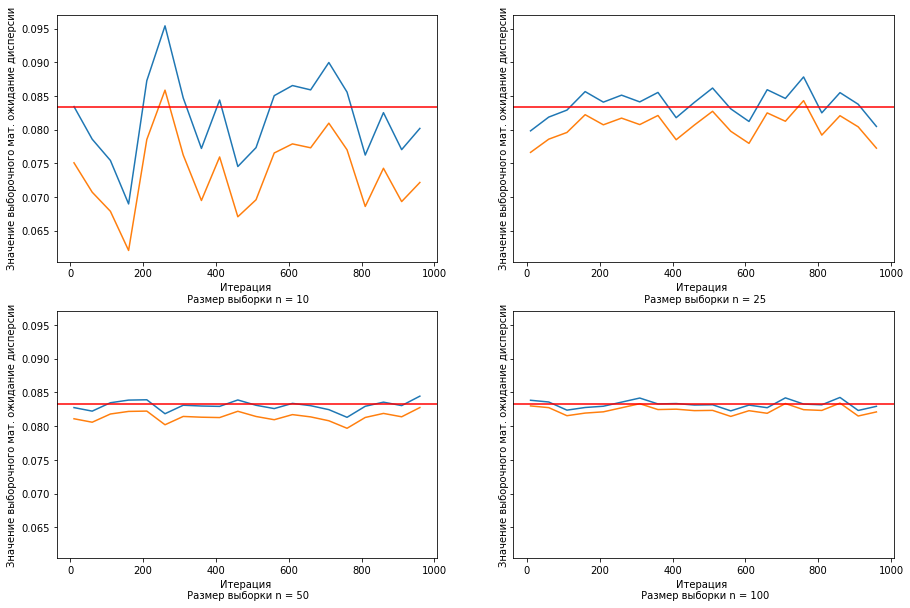

In [189]:
f, ax = plt.subplots(2, 2, sharey=True, figsize=(15,10))
for it, ax in zip([10, 25, 50, 100], ax.flat):
    x, y_1, y_2 = sample_iter(it)
    ax.plot(x, y_1)
    ax.plot(x, y_2);
    ax.set(ylabel='Значение выборочного мат. ожидание дисперсии')
    ax.set(xlabel='Итерация \n Размер выборки n = {}'.format(it));
    ax.axhline(y=1/12, color='r', linestyle='-')

### Отображаем данные на scatterplot'е дисперсию оценок

#### Синяя линия - исправленная дисперсия, оранжевая линия - выборочная дисперсия


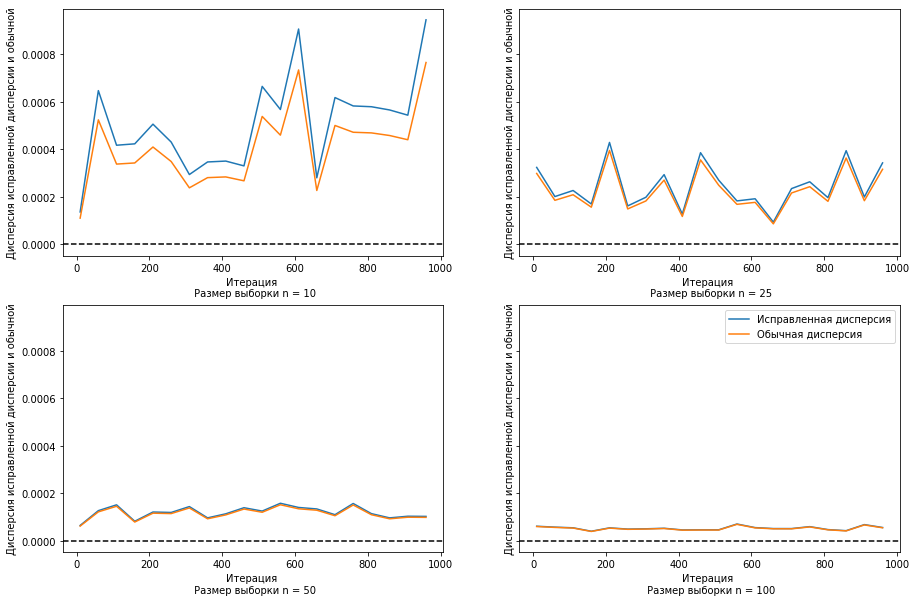

In [17]:
f, ax = plt.subplots(2, 2, sharey=True, figsize=(15,10))
for it, ax in zip([10, 25, 50, 100], ax.flat):
    x, y_1, y_2 = sample_iter_d(it)
    ax.plot(x, y_1)
    ax.plot(x, y_2);
    ax.set(ylabel='Дисперсия исправленной дисперсии и обычной')
    ax.set(xlabel='Итерация \n Размер выборки n = {}'.format(it));
    ax.axhline(y=0, color='black', linestyle='--')
    plt.legend(['Исправленная дисперсия', 'Обычная дисперсия'])

### Отображаем данные на scatterplot'е скорость сходимости дисперсий

#### Синяя линия - исправленная дисперсия, оранжевая линия - выборочная дисперсия, зеленная линия f(x) = 1/x
Видно, что с ростом n, рост сходимости эквивалентен O(1/x)

In [191]:
x, y_1, y_2, y_3 = [], [], [], []
for n_size in range(10, 1000, 10):
    x.append(n_size)
    y1, y2 = sample(n_size)
    y_1.append(abs(y1 - 1/12))
    y_2.append(abs(y2 - 1/12))
    y_3.append(1 / n_size)

Text(0.5, 1.0, 'Модуль разницы расстояний между выборочной и исправленной дисперсией')

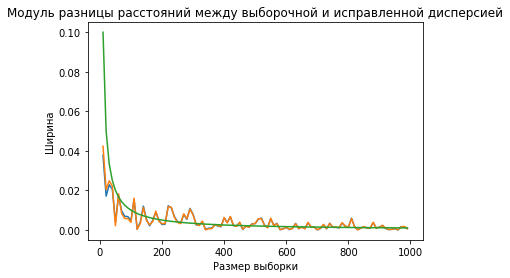

In [193]:
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.xlabel('Размер выборки')
plt.ylabel('Ширина')
plt.title('Модуль разницы расстояний между выборочной и исправленной дисперсией')